In [148]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from matplotlib import figure
#import seaborn as sns
from datetime import datetime, timedelta
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from statsmodels.graphics import tsaplots
from sklearn.preprocessing import normalize


In [155]:
sia = SIA()


#Create list of dates on which data was gathered:
DataDays = 12 #Number of days over which data was collected
dates = [] #Now gather dates of days on which data was collected:
for i in range(1,DataDays+1): 
    j = DataDays+3 - i
    todayStr = datetime.strftime(datetime.now() - timedelta(j), '%Y-%m-%d')
    dates.append(todayStr)
for todayStr in dates:
    print(todayStr)


#Sentiment analysis positivity and negativity thresholds:
posThresh = 0.2
negThresh = -0.2


#Set-up result lists:
newsSentiments = []
chartsSentiments = []
dailyPercPosNews = []
dailyPercNeutNews = []
dailyPercNegNews = []
dailyPercPosCharts = []
dailyPercNeutCharts = []
dailyPercNegCharts = []

2019-12-30
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
2020-01-05
2020-01-06
2020-01-07
2020-01-08
2020-01-09
2020-01-10


In [150]:
'''Functions'''

def removeDuplicates(names):
    namesList = []
    for line in names:
        if line not in namesList:
            namesList.append(line)
    return namesList

def sentimentAnalysis(namesList):
    Results = []

    for line in namesList:
        pol_score = sia.polarity_scores(line)
        pol_score['headline/name'] = line
        Results.append(pol_score)
    return Results

def assessPositivity(Results,posThresh,negThresh):
    df = pd.DataFrame.from_records(Results)
    df['positivity'] = 0
    pos_val = posThresh
    neg_val = negThresh
    df.loc[df['compound'] > pos_val, 'positivity'] = 1
    df.loc[df['compound'] < neg_val, 'positivity'] = -1
    return df

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stopWords and len(t)>2]
        tokens.extend(toks)
    
    return tokens

In [156]:
for todayStr in dates:
    #print(todayStr)    
    #todayStr = datetime.strftime(datetime.now() - timedelta(j), '%Y-%m-%d')
    newsStr = todayStr + '_Headlines.csv'
    header = 'Headlines ' + todayStr
    headlineAnalysisToday = todayStr + '_HeadlineAnalysis.csv'
    headlines = pd.read_csv(newsStr,names=[header])
    
    headList = removeDuplicates(headlines[header])
    sentimentScores = sentimentAnalysis(headList)
    df = assessPositivity(sentimentScores,posThresh,negThresh)
    df.to_csv(headlineAnalysisToday, mode='a', encoding='utf-8', index=False)
    newsSentiments.append(df['compound'].mean())
    dailyPercPosNews.append((df.positivity.value_counts(normalize=True) * 100)[1])
    dailyPercNeutNews.append((df.positivity.value_counts(normalize=True) * 100)[0])
    dailyPercNegNews.append((df.positivity.value_counts(normalize=True) * 100)[-1])

In [157]:
print(len(newsSentiments))
print('Average Headline Sentiments:',newsSentiments)
print('Percentage Negative News Headlines:',dailyPercNegNews)
print('Percentage Neutral News Headlines:',dailyPercNeutNews)
print('Percentage Positive News Headlines:',dailyPercPosNews)

12
Average Headline Sentiments: [-0.2708327272727273, -0.1975596774193549, -0.2678831168831169, -0.3354720930232558, -0.3138969696969697, -0.40033939393939416, -0.3317065934065935, -0.3421511111111112, -0.29038160919540235, -0.33264496124030996, -0.2888963636363636, -0.23874666666666663]
Percentage Negative News Headlines: [60.0, 51.61290322580645, 59.74025974025974, 61.627906976744185, 57.57575757575758, 62.62626262626263, 60.43956043956044, 60.0, 52.87356321839081, 58.91472868217055, 55.45454545454545, 48.888888888888886]
Percentage Neutral News Headlines: [20.0, 33.87096774193548, 23.376623376623375, 27.906976744186046, 28.78787878787879, 31.313131313131315, 30.76923076923077, 30.0, 35.63218390804598, 31.007751937984494, 35.45454545454545, 38.88888888888889]
Percentage Positive News Headlines: [20.0, 14.516129032258066, 16.883116883116884, 10.465116279069768, 13.636363636363635, 6.0606060606060606, 8.791208791208792, 10.0, 11.494252873563218, 10.077519379844961, 9.090909090909092, 1

In [158]:
for todayStr in dates:
    #print(todayStr)    
    #todayStr = datetime.strftime(datetime.now() - timedelta(j), '%Y-%m-%d')
    chartsStr = 'top200_' + todayStr + '.csv'
    #header = 'Charts ' + todayStr
    chartsAnalysisToday = 'top200_' + todayStr + '_Analysis.csv'
    #headlines = pd.read_csv(newsStr,names=[header])
    charts = pd.read_csv(chartsStr)
    
    headList = removeDuplicates(charts['Track Name'])
    sentimentScores = sentimentAnalysis(headList)
    df = assessPositivity(sentimentScores,posThresh,negThresh)
    df['position'] = range(0, len(df)) #add the indices back in so that we can track them and use them to obtain the track IDs (for Web App Function)
    df.to_csv(chartsAnalysisToday, mode='a', encoding='utf-8', index=False)    
    chartsSentiments.append(df['compound'].mean())
    dailyPercPosCharts.append((df.positivity.value_counts(normalize=True) * 100)[1])
    dailyPercNeutCharts.append((df.positivity.value_counts(normalize=True) * 100)[0])
    dailyPercNegCharts.append((df.positivity.value_counts(normalize=True) * 100)[-1])

In [159]:
print(len(chartsSentiments))
print('Average Chart Song Names Sentiments:',chartsSentiments)
print('Percentage Negative Chart Song Names:',dailyPercNegCharts)
print('Percentage Neutral Chart Song Names:',dailyPercNeutCharts)
print('Percentage Positive Chart Song Names:',dailyPercPosCharts)

12
Average Chart Song Names Sentiments: [0.023316582914572864, 0.037597487437185925, 0.021001507537688435, 0.014409547738693474, 0.021846733668341722, 0.02125527638190955, 0.014289949748743723, 0.024587437185929657, 0.01709748743718593, 0.011922613065326637, 0.007884000000000016, 0.012032000000000004]
Percentage Negative Chart Song Names: [12.060301507537687, 11.055276381909549, 11.557788944723619, 12.060301507537687, 12.562814070351758, 12.060301507537687, 12.562814070351758, 11.557788944723619, 12.060301507537687, 13.06532663316583, 14.000000000000002, 14.000000000000002]
Percentage Neutral Chart Song Names: [70.35175879396985, 68.84422110552764, 71.85929648241206, 71.85929648241206, 69.34673366834171, 70.85427135678391, 70.85427135678391, 70.85427135678391, 71.35678391959799, 70.35175879396985, 69.5, 69.5]
Percentage Positive Chart Song Names: [17.587939698492463, 20.100502512562816, 16.582914572864322, 16.08040201005025, 18.090452261306535, 17.08542713567839, 16.582914572864322, 17

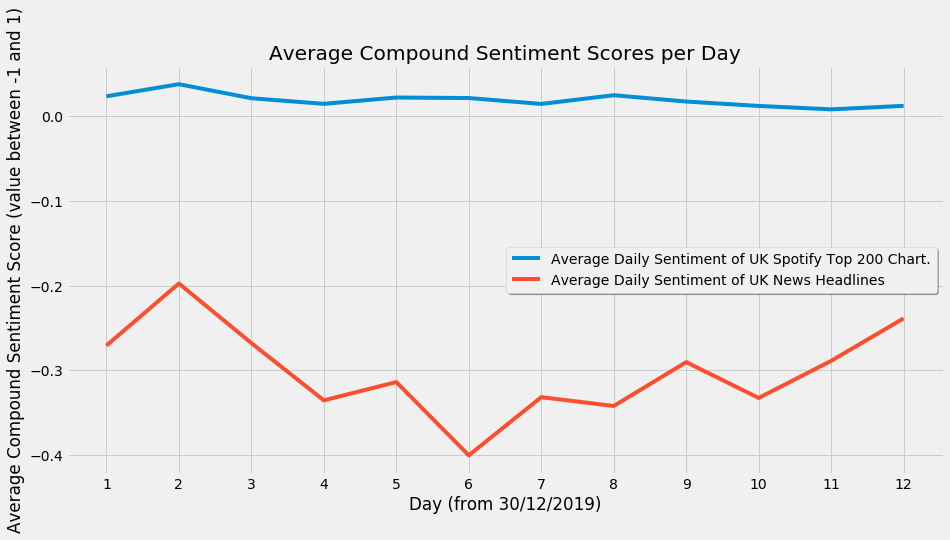

In [160]:
plt.figure(figsize=(14,7))
plt.title('Average Compound Sentiment Scores per Day')
plt.ylabel('Average Compound Sentiment Score (value between -1 and 1)')
plt.xlabel('Day (from 30/12/2019)')
plt.xticks(range(1,DataDays+1))
plt.plot(np.arange(1,DataDays+1,1), chartsSentiments, label = 'Average Daily Sentiment of UK Spotify Top 200 Chart.')
plt.plot(np.arange(1,DataDays+1,1), newsSentiments, label='Average Daily Sentiment of UK News Headlines')
plt.legend(loc='best', shadow=True, ncol=1)
plt.show()

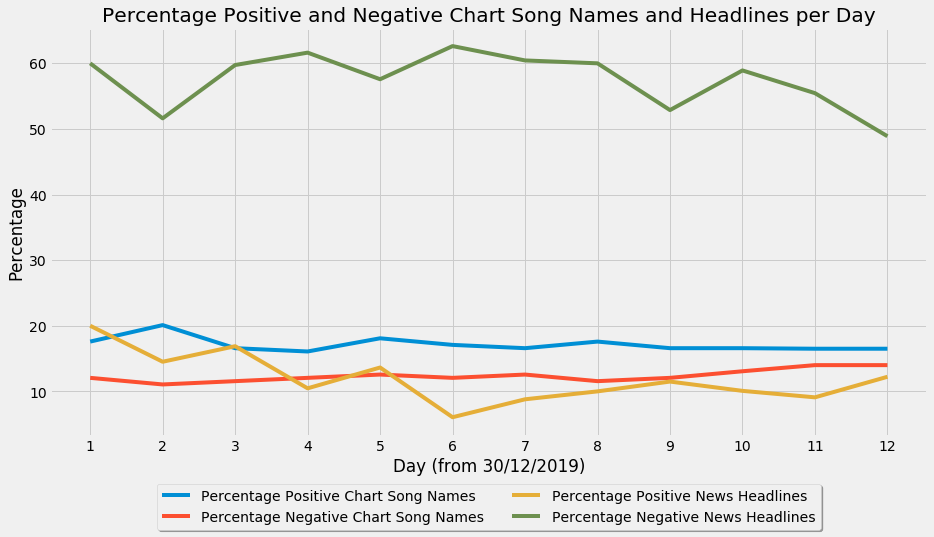

In [161]:
plt.figure(figsize=(14,7))
plt.title('Percentage Positive and Negative Chart Song Names and Headlines per Day')
plt.ylabel('Percentage')
plt.xlabel('Day (from 30/12/2019)')
plt.xticks(range(1,DataDays+1))
plt.plot(np.arange(1,DataDays+1,1), dailyPercPosCharts, label = 'Percentage Positive Chart Song Names')
plt.plot(np.arange(1,DataDays+1,1), dailyPercNegCharts, label = 'Percentage Negative Chart Song Names')
plt.plot(np.arange(1,DataDays+1,1), dailyPercPosNews, label = 'Percentage Positive News Headlines')
plt.plot(np.arange(1,DataDays+1,1), dailyPercNegNews, label = 'Percentage Negative News Headlines')
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1), shadow=True, ncol=2)
plt.show()

In [162]:
chartsRatio = np.array(dailyPercPosCharts)/np.array(dailyPercNegCharts)
pprint(chartsRatio)
newsRatio = np.array(dailyPercPosNews)/np.array(dailyPercNegNews)
pprint(newsRatio)
newsRatioInv = np.array(dailyPercNegNews)/np.array(dailyPercPosNews)
pprint(newsRatioInv)

array([1.45833333, 1.81818182, 1.43478261, 1.33333333, 1.44      ,
       1.41666667, 1.32      , 1.52173913, 1.375     , 1.26923077,
       1.17857143, 1.17857143])
array([0.33333333, 0.28125   , 0.2826087 , 0.16981132, 0.23684211,
       0.09677419, 0.14545455, 0.16666667, 0.2173913 , 0.17105263,
       0.16393443, 0.25      ])
array([ 3.        ,  3.55555556,  3.53846154,  5.88888889,  4.22222222,
       10.33333333,  6.875     ,  6.        ,  4.6       ,  5.84615385,
        6.1       ,  4.        ])


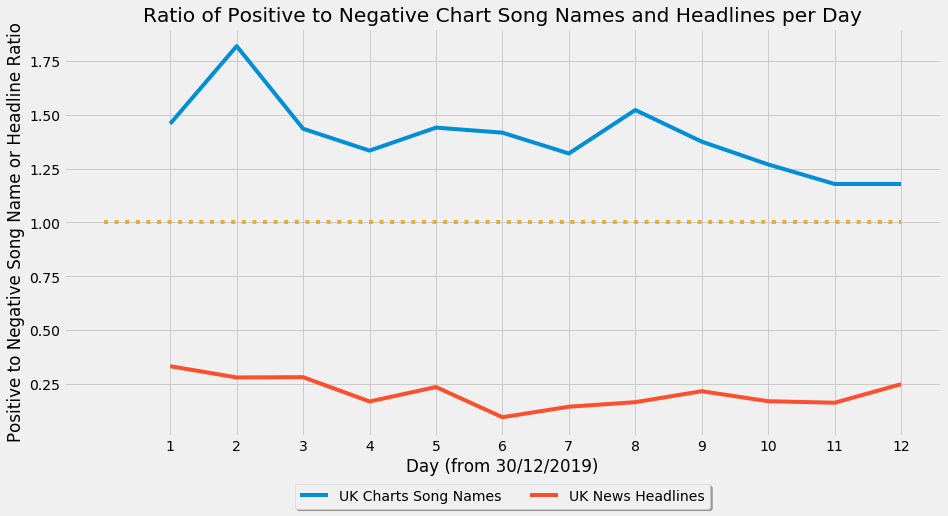

In [163]:
plt.figure(figsize=(14,7))
plt.title('Ratio of Positive to Negative Chart Song Names and Headlines per Day')
plt.ylabel('Positive to Negative Song Name or Headline Ratio')
plt.xlabel('Day (from 30/12/2019)')
plt.xticks(range(1,DataDays+1))
plt.plot(np.arange(1,DataDays+1,1), chartsRatio, label = 'UK Charts Song Names')
plt.plot(np.arange(1,DataDays+1,1), newsRatio, label = 'UK News Headlines')
plt.plot(np.ones(DataDays+1),linestyle=':')
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1), shadow=True, ncol=2)
plt.show()

In [164]:
chartsPercRatioChange = [100]
for i in range(1,DataDays):
    chartsPercRatioChange.append(((chartsRatio[i]-chartsRatio[i-1])/chartsRatio[i-1])*100)
pprint(chartsPercRatioChange)

newsPercRatioChange = [100]
for i in range(1,DataDays):
    newsPercRatioChange.append(((newsRatio[i]-newsRatio[i-1])/newsRatio[i-1])*100)
pprint(newsPercRatioChange)

[100,
 24.67532467532466,
 -21.086956521739133,
 -7.070707070707072,
 8.000000000000036,
 -1.6203703703703918,
 -6.8235294117647065,
 15.283267457180486,
 -9.642857142857121,
 -7.692307692307712,
 -7.142857142857152,
 0.0]
[100,
 -15.624999999999979,
 0.4830917874396057,
 -39.912917271407835,
 39.47368421052628,
 -59.13978494623655,
 50.303030303030326,
 14.583333333333313,
 30.434782608695638,
 -21.31578947368421,
 -4.1614123581336475,
 52.49999999999999]


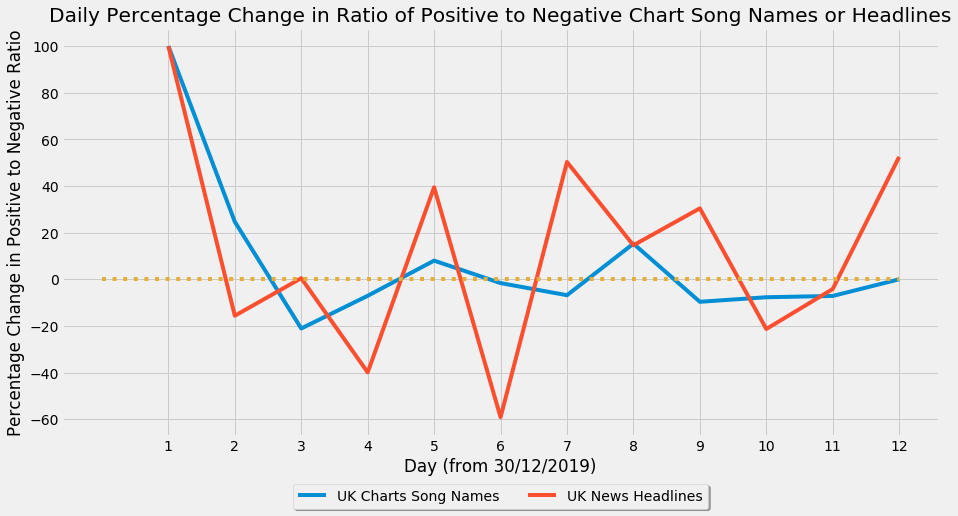

In [165]:
plt.figure(figsize=(14,7))
plt.title('Daily Percentage Change in Ratio of Positive to Negative Chart Song Names or Headlines')
plt.ylabel('Percentage Change in Positive to Negative Ratio')
plt.xlabel('Day (from 30/12/2019)')
plt.xticks(range(1,DataDays+1))
plt.plot(np.arange(1,DataDays+1,1), chartsPercRatioChange, label = 'UK Charts Song Names')
plt.plot(np.arange(1,DataDays+1,1), newsPercRatioChange, label = 'UK News Headlines')
plt.plot(np.zeros(DataDays+1),linestyle=':')
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1), shadow=True, ncol=2)
plt.show()

<Figure size 1440x720 with 0 Axes>

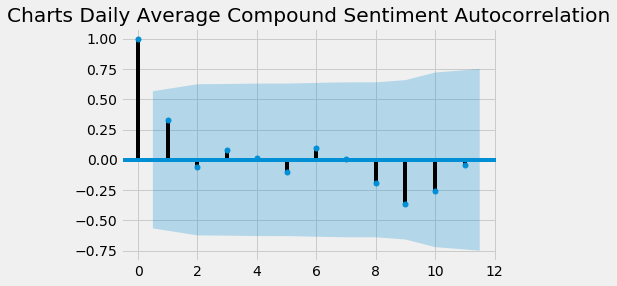

In [166]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
fig = tsaplots.plot_acf(chartsSentiments, lags=DataDays-1,
                       title='Charts Daily Average Compound Sentiment Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

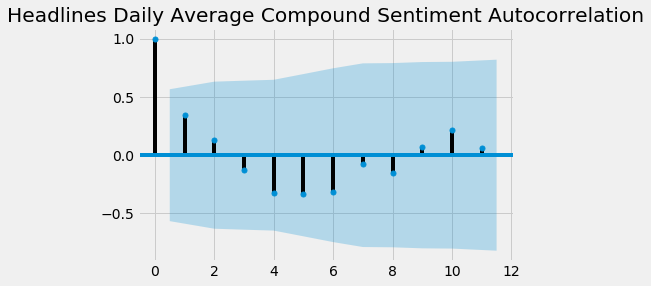

In [167]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_acf(newsSentiments, lags=DataDays-1,
                       title='Headlines Daily Average Compound Sentiment Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

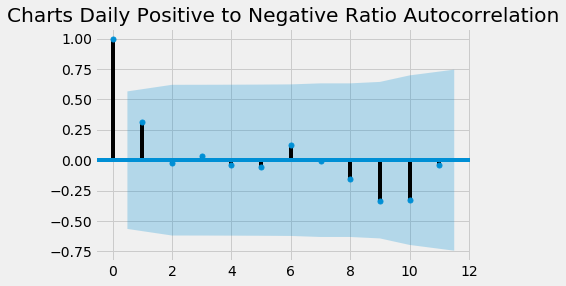

In [168]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_acf(chartsRatio, lags=DataDays-1,
                       title='Charts Daily Positive to Negative Ratio Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

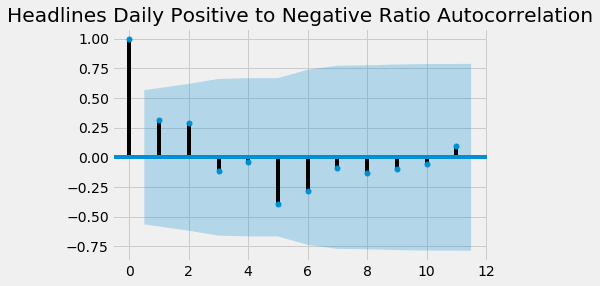

In [169]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_acf(newsRatio, lags=DataDays-1,
                       title='Headlines Daily Positive to Negative Ratio Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

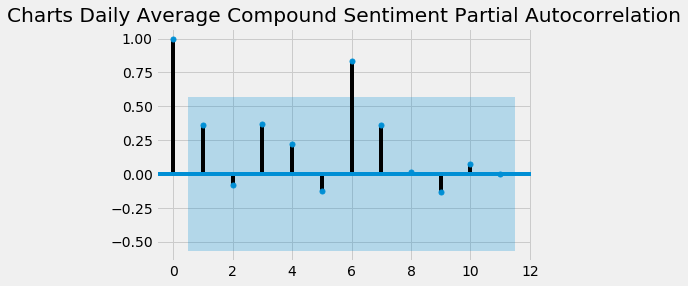

In [170]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_pacf(chartsSentiments, lags=DataDays-1,
                       title='Charts Daily Average Compound Sentiment Partial Autocorrelation',
                        method='ols')
plt.show()

<Figure size 1440x720 with 0 Axes>

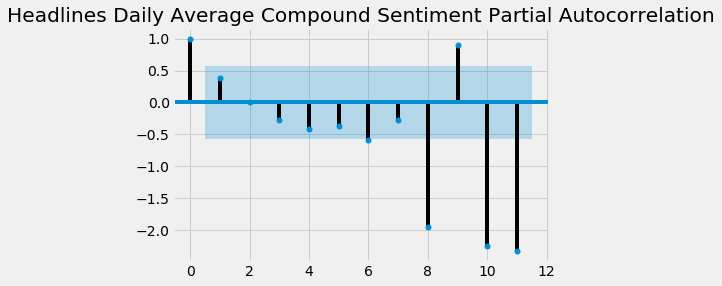

In [171]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_pacf(newsSentiments, lags=DataDays-1,
                       title='Headlines Daily Average Compound Sentiment Partial Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

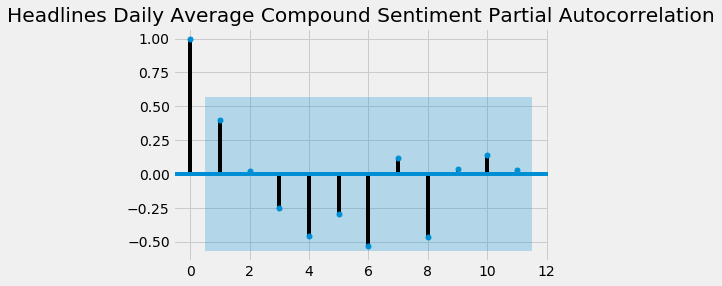

In [172]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_pacf(newsSentiments, lags=DataDays-1,
                       title='Headlines Daily Average Compound Sentiment Partial Autocorrelation',
                        method='ols')
plt.show()

<Figure size 1440x720 with 0 Axes>

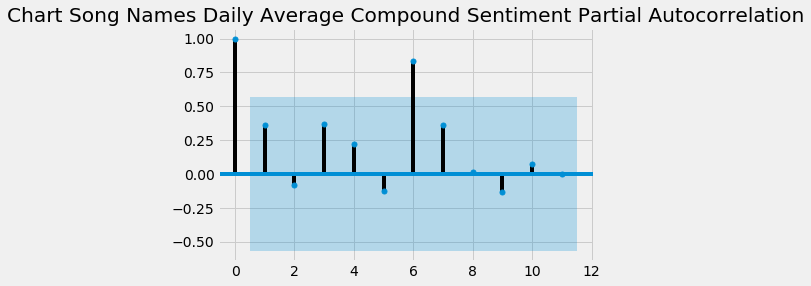

In [173]:
plt.figure(figsize=(20,10))
fig = tsaplots.plot_pacf(chartsSentiments, lags=DataDays-1,
                       title='Chart Song Names Daily Average Compound Sentiment Partial Autocorrelation',
                        method='ols')
plt.show()

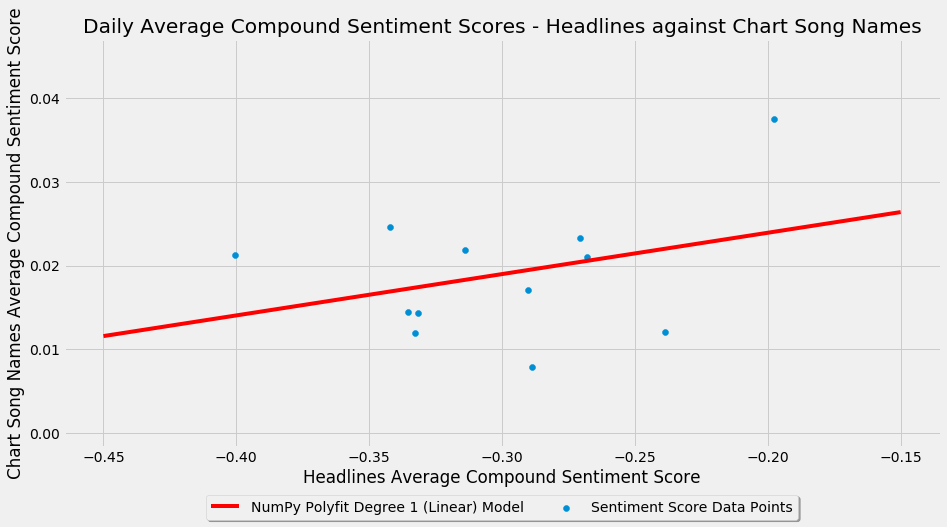

Linear Model coeeficients:
Gradient: 0.04945931357805294
Intercept: 0.033817836071905895


In [174]:
plt.figure(figsize=(14,7))
plt.title('Daily Average Compound Sentiment Scores - Headlines against Chart Song Names')
plt.ylabel('Chart Song Names Average Compound Sentiment Score')
plt.xlabel('Headlines Average Compound Sentiment Score')
#plt.xticks(range(1,DataDays+1))
plt.scatter(newsSentiments,chartsSentiments,label='Sentiment Score Data Points')
#plt.legend(loc='best', shadow=True, ncol=1)

linModel = np.polyfit(newsSentiments,chartsSentiments,1)
xp = np.linspace(-0.45,-0.15,100)
yp = xp*linModel[0]+linModel[1]
plt.plot(xp,yp,label='NumPy Polyfit Degree 1 (Linear) Model',color='red')
plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1), shadow=True, ncol=2)

plt.show()

print('Linear Model coeeficients:')
print('Gradient:',linModel[0])
print('Intercept:',linModel[1])

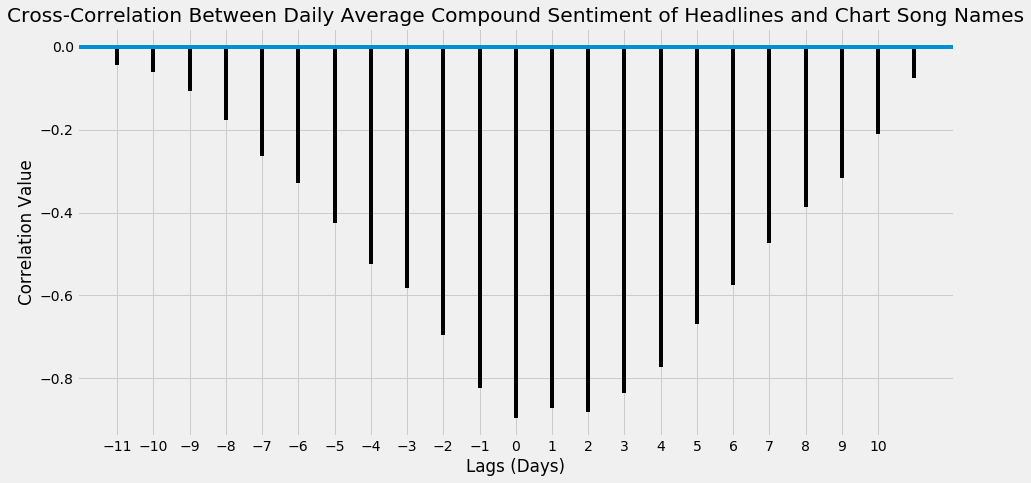

In [175]:
plt.figure(figsize=(14,7))
plt.title('Cross-Correlation Between Daily Average Compound Sentiment of Headlines and Chart Song Names')
xcr = plt.xcorr(newsSentiments,chartsSentiments,maxlags=DataDays-1)
plt.xticks(range(-(DataDays-1),DataDays-1))
plt.xlabel('Lags (Days)')
plt.ylabel('Correlation Value')
plt.show()

In [176]:
pprint(xcr)
# correlationVals = xcr[]
xcr[1][xcr[0]==0]

(array([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11]),
 array([-0.04364915, -0.06044121, -0.10728933, -0.17593259, -0.26324024,
       -0.32950116, -0.42584635, -0.52325931, -0.58154057, -0.69504227,
       -0.82351263, -0.89481778, -0.87182098, -0.8820967 , -0.83579601,
       -0.77261543, -0.66967785, -0.57431714, -0.47230342, -0.38556732,
       -0.31654581, -0.21046408, -0.07456569]),
 <matplotlib.lines.Line2D object at 0x7f477fc1c490>)


array([-0.89481778])

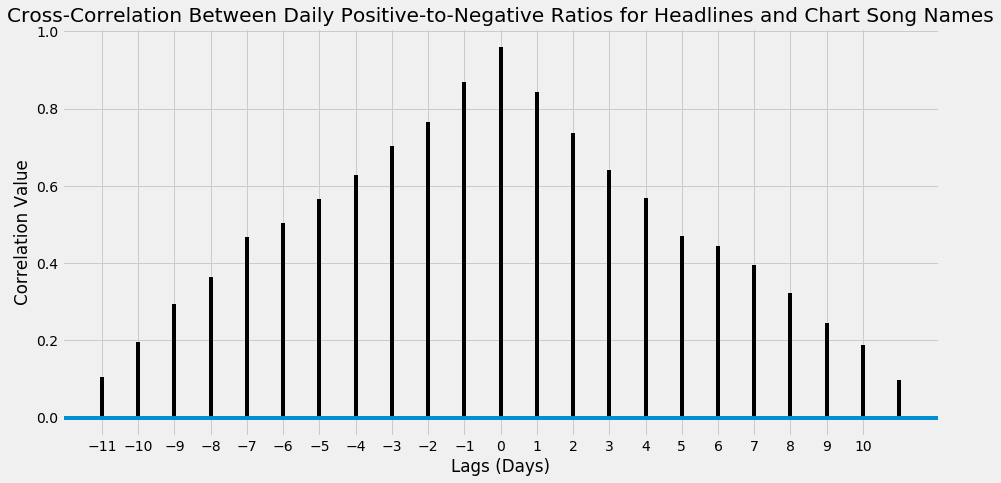

Maximum Correlation Coefficient: [0.96031484]


In [178]:
plt.figure(figsize=(14,7))
plt.title('Cross-Correlation Between Daily Positive-to-Negative Ratios for Headlines and Chart Song Names')
xcrRatio = plt.xcorr(newsRatio,chartsRatio,maxlags=DataDays-1)
plt.xticks(range(-(DataDays-1),DataDays-1))
plt.xlabel('Lags (Days)')
plt.ylabel('Correlation Value')
plt.show()
print('Maximum Correlation Coefficient:', xcrRatio[1][xcr[0]==0])